## Recap on last session (Organizing and Cleaning Data)
- Here’s a code snippet from the last session — but it has a few hidden mistakes. Can you find and fix them?

In [19]:
# Create the data with a dictionary
data = {
    "Country": ["Egypt", "Saudi Arabia", "Indonesia", "Pakistan", "Turkey", "Malaysia", "Egypt", "Morocco"],
    "Population": [104.12, 35.01, 273.52, 220.89, None, 32.37, 36.91, 104.12, 206.14],
    "Area": [1002, 2149, 1913, 881, 783.6, 330.8, 446.6, 1002, 923.8]
}

In [ ]:
# turn the dictionary into a dataframe
import pandas as pd
islamic_countries_df = pd.DataFrame(data)

# instructor note: there is a missing value in the Country.. add "Nigeria" at the end.

In [ ]:
# Remove the duplicated rows
islamic_countries_df.drop_duplicate(inplace=True)

# instructor note: add the "s" .. (drop_duplicate) --> (.drop_duplicates)

In [15]:
# Add the missing value for the Population of Turkey
islamic_countries_df.loc[islamic_countries_df["Country"] == "Turkey"] = 85.04 

# instructor note: this will change all the values in that row!! 
# --> specify the "Population" column to be edited
# --> islamic_countries_df.loc[islamic_countries_df["Country"] == "Turkey", "Population"] = 85.04 

In [16]:
print(islamic_countries_df)

        Country  Population     Area
0         Egypt      104.12  1002.00
1  Saudi Arabia       35.01  2149.00
2     Indonesia      273.52  1913.00
3      Pakistan      220.89   881.00
4         85.04       85.04    85.04
5         Egypt       32.37   330.80
6      Malaysia       36.91   446.60
7       Morocco      206.14   923.80


*******
*******
# Session 3: Exploring Data - Discovering Stories Within Numbers
<img src="3 data exploration.png" alt="Drawing" style="width: 800px;"/>

*******
*******

## `1- Exploring Our Dataset`

`We’ll explore a dataset about Islamic Scientists and Their Discoveries. Let’s see what stories we can uncover!`

> #### 1.1 Import Necessary Libraries
- Here we will import important libraries `[pandas - numpy]` which will help us **deal with tapular data** better. 
- Also import `[matplotlib]` to be able to **visualize this data** later.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

> #### 1.2 Create the dataset
- Let’s create a dictionary with information about great Muslim scientists and their amazing discoveries! 
- It will include their names, fields of contribution, discoveries, and years of the discovery.

In [2]:
data = {
    "Scientist": ["Al-Zahrawi", "Ibn Sina", "Al-Khwarizmi", "Al-Battani", "Ibn Al-Haytham", "Al-Farabi", "Ibn Rushd", "Al-Razi", "Ibn Khaldun", "Ibn Al-Nafis"],
    
    "Field": ["Medicine", "Philosophy", "Mathematics", "Astronomy", "Optics", "Music", "Philosophy", "Chemistry", "Sociology", "Medicine"],
    
    "Discovery": ["Surgical Tools", "Canon of Medicine", "Algebra", "Astronomical Tables", "Camera Obscura", "Musical Notation", "Aristotelian Philosophy", "Distillation", "Historical Analysis", "Pulmonary Circulation"],
   
    "Year": [1000, 980, 830, 877, 1021, 872, 1126, 865, 1332, 1242]
}

> #### 1.3 Transform the dataset from `dictionary` to `dataframe`
- The Pandas library will be used to do this.

In [3]:
scientists_df = pd.DataFrame(data)

> #### 1.4 View the new dataset `dataframe`
- The print() statement will be used to do this.

In [4]:
print(scientists_df)

        Scientist        Field                Discovery  Year
0      Al-Zahrawi     Medicine           Surgical Tools  1000
1        Ibn Sina   Philosophy        Canon of Medicine   980
2    Al-Khwarizmi  Mathematics                  Algebra   830
3      Al-Battani    Astronomy      Astronomical Tables   877
4  Ibn Al-Haytham       Optics           Camera Obscura  1021
5       Al-Farabi        Music         Musical Notation   872
6       Ibn Rushd   Philosophy  Aristotelian Philosophy  1126
7         Al-Razi    Chemistry             Distillation   865
8     Ibn Khaldun    Sociology      Historical Analysis  1332
9    Ibn Al-Nafis     Medicine    Pulmonary Circulation  1242


*******
*******
## `2- let's answer some questions through exploring our dataset`

   `1- How many scientists are in our dataset?`

   `2- Which field has the most contributions?`

   `3- What’s the oldest discovery?`

   `4- Which discovery is the most recent?`

> #### 2.1 How many scientists are in our dataset?
- We can use the len() function to find out the total number of scientists in our dataset.

In [5]:
number = len(scientists_df)

print(f"Scientists: {number}")

Scientists: 10


> #### 2.2 Which field has the most contributions?
- We will use the value_counts() method to find out the total count of each field in our dataset.

In [6]:
scientists_df['Field'].value_counts()

Medicine       2
Philosophy     2
Mathematics    1
Astronomy      1
Optics         1
Music          1
Chemistry      1
Sociology      1
Name: Field, dtype: int64

In [7]:
most_contrib_field = scientists_df['Field'].value_counts().idxmax()

print(f"top field: {most_contrib_field}")

top field: Medicine


- **df['Field']:** This selects the "Field" column in your DataFrame.
<br>

- **value_counts():** Counts the occurrences of each unique value in the "Field" column.
<br>
- **idxmax():** Returns the index (field) that has the highest count.

> #### 2.3 What’s the oldest discovery?
- We will use the value_counts() method to find out the total count of each field in our dataset.

In [8]:
oldest = scientists_df.loc[scientists_df['Year'].idxmin(), 'Discovery']

print(f"Oldest Discovery: {oldest}")

Oldest Discovery: Algebra


- **scientists_df['Year']:** This selects the "Year" column in the scientists_df DataFrame, which contains the years of discovery for each scientist.
<br>

- **idxmin():** idxmin() returns the index (position) of the minimum value in the "Year" column, which means it will give you the row where the earliest year (oldest) is located. In this context, it's finding the scientist with the oldest discovery year.
<br>
- **scientists_df.loc[...]:** loc[] is used to select specific rows and columns in the DataFrame. It takes two arguments: the row index (in this case, the index found by idxmin()) and the column(s) you want to access (here, 'Discovery').
<br>
- **'Discovery':** This specifies the column from which to retrieve the data, in this case, the "Discovery" column. After identifying the index of the earliest year, .loc[] fetches the corresponding discovery for that scientist.

> #### 2.4 Which discovery is the most recent?
- Take a moment to think... Can you find what is the most recent discovery?

In [9]:


# recent = scientists_df.loc[scientists_df['Year'].idxmax(), 'Discovery']
# print(f"Most Recent Discovery: {recent}")

Most Recent Discovery: Historical Analysis


*******
*******

## `3- Adding New Insights`

   `Let’s make things even more exciting by adding a brand new column to our dataset that will supercharge our analysis!`

Let’s calculate how many years have passed since each discovery.

> #### 3.1 Let’s figure out how many years have passed since each discovery!
- We’ll calculate the years since each discovery .. then add the results to our new column.

In [10]:
scientists_df["Years Since"] = 2025 - scientists_df["Year"]

print(scientists_df)

        Scientist        Field                Discovery  Year  Years Since
0      Al-Zahrawi     Medicine           Surgical Tools  1000         1025
1        Ibn Sina   Philosophy        Canon of Medicine   980         1045
2    Al-Khwarizmi  Mathematics                  Algebra   830         1195
3      Al-Battani    Astronomy      Astronomical Tables   877         1148
4  Ibn Al-Haytham       Optics           Camera Obscura  1021         1004
5       Al-Farabi        Music         Musical Notation   872         1153
6       Ibn Rushd   Philosophy  Aristotelian Philosophy  1126          899
7         Al-Razi    Chemistry             Distillation   865         1160
8     Ibn Khaldun    Sociology      Historical Analysis  1332          693
9    Ibn Al-Nafis     Medicine    Pulmonary Circulation  1242          783


- **scientists_df["Year"]:** This selects the "Year" column in the scientists_df DataFrame, which contains the year each scientist made their discovery.
<br>

- **2025 - scientists_df["Year"]:** This subtracts the "Year" (discovery year) from 2025, which tells us how many years have passed since that discovery. For example, if a discovery was made in 1900, the result would be 2025 - 1900 = 125 years since the discovery.
<br>
- **scientists_df["Years Since"] = ...:** This creates a new column in the DataFrame called "Years Since" and assigns the calculated number of years since each discovery.

******
******
## `4- Visualization: Bar Chart vs. Histogram 📊`

`Let’s create a Histogram to see which year ranges have the most discoveries! It’s going to be fun to see the patterns!`

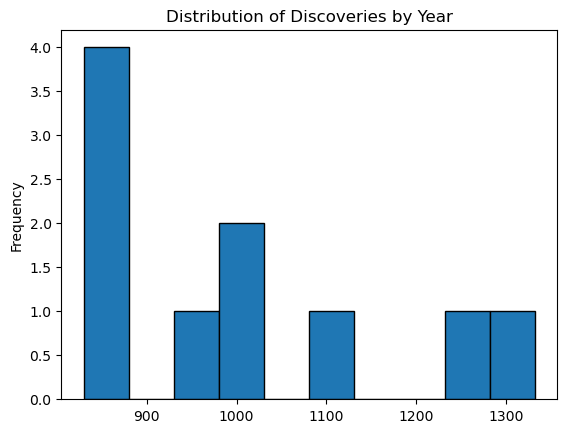

In [11]:
# Set the chart type to Histogram.
# Use the (Year) column for the x-axis (horizontal)
# bins=10: --> Divides the years into 10 groups (bins).
# edgecolor='black' --> Adds black borders to the bars for clarity.
plt.hist(scientists_df['Year'], bins=10, edgecolor='black')

# Now, let’s add a title to the entire bar chart to describe what it shows.
plt.title("Distribution of Discoveries by Year")

# Set a label for the x-axis to describe the Countries.
# Set a label for the y-axis to represent the Population in Millions.plt.xlabel("Year")
plt.ylabel("Frequency")

# Finally, show the chart.
plt.show()

- **bins=10:** This divides the data into 10 intervals (bins). Each bin will represent a range of years, and the histogram will show how many discoveries fall into each range. You can adjust the number of bins to change the width of the year ranges.

******
******
# 📚 Reflection

`Today, we learned that:`

>Data exploration helps uncover hidden stories in numbers.

>Asking the right questions leads to meaningful insights.

>Visualizing data makes it easier to understand patterns and trends.

`Think About It:`

>Why is it important to explore data before making decisions?

>How can exploring data help us in our daily lives?

>What new questions would you ask if you had more data?

******
******
# 📝 Quiz Time! (Multiple Choice Questions)

1. Which scientist is known for Algebra?<br>
    `A) Ibn Sina`<br>
    `B) Al-Zahrawi`<br>
    `C) Al-Khwarizmi`<br>
    `D) Al-Razi`<br><br>

2. What is the oldest discovery in our dataset?<br>
    `A) Surgical Tools`<br>
    `B) Algebra`<br>
    `C) Pulmonary Circulation`<br>
    `D) Canon of Medicine`<br><br>

3. Why is data exploration important?<br>
    `A) It helps us visualize data`<br>
    `B) It uncovers hidden patterns`<br>
    `C) It makes data more colorful`<br>
    `D) It’s not important`<br><br>

4. Which field has the most contributions in our dataset?<br>
    `A) Medicine`<br>
    `B) Mathematics`<br>
    `C) Philosophy`<br>
    `D) Astronomy`<br><br>

5. What type of chart shows the distribution of data over time?<br>
    `A) Bar Chart`<br>
    `B) Pie Chart`<br>
    `C) Line Chart`<br>
    `D) Histogram`

******
******
# 🏡 Homework
 Explore a New Dataset!

1. **Find/create a dataset** on a topic you love (e.g., animals, sports, history). 
<br>

2. **Ask three questions** you’d like to answer using the data.
<br>
3. **Create a bar chart and a histogram** to visualize your findings.
<br>
4. **Share your insights** with your classmates!